### Автоматический отбор предложений, содержащих библейские цитаты и аллюзии, осуществлялся методом семантического поиска с использованием модели Sentence Transformers 'distiluse-base-multilingual-cased-v2' (1), преобразующей предложения и абзацы (sequences) в 512-мерное векторное пространство.

(1)
    @inproceedings{reimers-2019-sentence-bert,
    title = "Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks",
    author = "Reimers, Nils and Gurevych, Iryna",
    booktitle = "Proceedings of the 2019 Conference on Empirical Methods in Natural Language Processing",
    month = "11",
    year = "2019",
    publisher = "Association for Computational Linguistics",
    url = "http://arxiv.org/abs/1908.10084",

   

In [ ]:
! pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from sentence_transformers import SentenceTransformer, util

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
st_model = SentenceTransformer("distiluse-base-multilingual-cased-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd

### Текст American Standard Version of the Bible

In [ ]:
bible = pd.read_csv('/content/prep_asv_O_N_SW.csv')
bible

,Unnamed: 0,Text,prep_text,len
0,0,In the beginning God created the heavens and t...,in the beginning god created the heavens and t...,55
1,1,And the earth was waste and void; and darkness...,and the earth was waste and void and darkness...,134
2,2,"And God said, Let there be light: and there wa...",and god said let there be light and there wa...,54
3,3,"And God saw the light, that it was good: and G...",and god saw the light that it was good and g...,85
4,4,"And God called the light Day, and the darkness...",and god called the light day and the darkness...,63
...,...,...,...,...
35345,35345,and if any man shall take away from the words ...,and if any man shall take away from the words ...,185
35346,35346,"He who testifieth these things saith, Yea: I c...",he who testifieth these things saith yea i c...,58
35347,35347,"Amen: come, Lord Jesus.",amen come lord jesus,23
35348,35348,The grace of the Lord Jesus be with the saints.,the grace of the lord jesus be with the saints,47


### Текст статей *The Economist*

In [ ]:
econ = pd.read_csv('/content/prep_bio_Economist_SW.csv')
econ

,Unnamed: 0,Text,cleaned_text,len
0,0,FOR THE past four billion years or so the only...,for the past four billion years or so the only...,154
1,1,Sometimes the gene would be damaged or scrambl...,sometimes the gene would be damaged or scrambl...,96
2,2,From that raw material arose the glories of na...,from that raw material arose the glories of na...,62
3,3,"But beneath it all, gene begat gene.That is no...",but beneath it all gene begat gene that is no ...,58
4,4,Now genes can be written from scratch and edit...,now genes can be written from scratch and edit...,90
...,...,...,...,...
35847,35972,"He found that, after 15 days, parasite loads i...",he found that after days parasite loads in ani...,269
35848,35973,Dr Kumar plans to try—though he will use genet...,dr kumar plans to try though he will use genet...,137
35849,35974,"But many, probably most, doctors are suspiciou...",but many probably most doctors are suspicious ...,165
35850,35975,"Dr Kumar’s findings are, nevertheless, interes...",dr kumar s findings are nevertheless interesting,49


In [ ]:
bible

,Unnamed: 0,Text,prep_text,len
0,0,In the beginning God created the heavens and t...,in the beginning god created the heavens and t...,55
1,1,And the earth was waste and void; and darkness...,and the earth was waste and void and darkness...,134
2,2,"And God said, Let there be light: and there wa...",and god said let there be light and there wa...,54
3,3,"And God saw the light, that it was good: and G...",and god saw the light that it was good and g...,85
4,4,"And God called the light Day, and the darkness...",and god called the light day and the darkness...,63
...,...,...,...,...
35345,35345,and if any man shall take away from the words ...,and if any man shall take away from the words ...,185
35346,35346,"He who testifieth these things saith, Yea: I c...",he who testifieth these things saith yea i c...,58
35347,35347,"Amen: come, Lord Jesus.",amen come lord jesus,23
35348,35348,The grace of the Lord Jesus be with the saints.,the grace of the lord jesus be with the saints,47


In [ ]:
sent_bible = bible['prep_text'].values

In [ ]:
sent_bible

array(['in the beginning god created the heavens and the earth ',
       'and the earth was waste and void  and darkness was upon the face of the deep  and the spirit of god moved upon the face of the waters ',
       'and god said  let there be light  and there was light ', ...,
       'amen  come  lord jesus ',
       'the grace of the lord jesus be with the saints ', 'amen '],
      dtype=object)

In [ ]:
sent_econ = econ['cleaned_text'].values

In [ ]:
sent_econ

array(['for the past four billion years or so the only way for life on earth to produce a sequence of dna a gene was by copying a sequence it already had to hand ',
       'sometimes the gene would be damaged or scrambled the copying imperfect or undertaken repeatedly ',
       'from that raw material arose the glories of natural selection ',
       ...,
       'but many probably most doctors are suspicious of herbal remedies in principle because it is hard to control their quality in the same way as a factory made chemical ',
       'dr kumar s findings are nevertheless interesting ',
       'and regardless of whether his experiments in herbalism lead anywhere his genetic engineering of artemisinin producing tobacco plants is a result that deserves close scrutiny and follow up '],
      dtype=object)

Тексты уже разделены на предложения

In [ ]:
len(sent_bible)

35350

In [ ]:
len(sent_econ)

35852

SentenceTransformers не требует никакой специальной предобработки текстов, поэтому списки предложений можно подавать на вход модели в том виде, в котором они сейчас есть:

In [ ]:
b_embeddings = st_model.encode(sent_bible)

In [ ]:
len(sent_bible)

35350

In [ ]:
len(b_embeddings)

35350

In [ ]:
e_embeddings = st_model.encode(sent_econ)

In [ ]:
type(e_embeddings)

numpy.ndarray

In [ ]:
b_embeddings.shape

(35350, 512)

In [ ]:
e_embeddings.shape

(35852, 512)

In [ ]:
b_embeddings

array([[ 0.01631019,  0.00859007, -0.0263739 , ..., -0.02680467,
        -0.0069536 ,  0.00468522],
       [-0.09353953, -0.01438253, -0.04340018, ...,  0.06417133,
         0.02606911,  0.02746714],
       [ 0.03360587, -0.0316679 ,  0.00305733, ...,  0.02500105,
        -0.00283128,  0.04605927],
       ...,
       [ 0.02977351,  0.01798968,  0.01452001, ..., -0.01597263,
        -0.01629958, -0.01706902],
       [-0.04391462, -0.0129352 ,  0.0545049 , ..., -0.01218687,
        -0.08655361, -0.01376863],
       [ 0.02374658,  0.00280779, -0.02220878, ..., -0.02973845,
         0.01998835, -0.04151792]], dtype=float32)

In [ ]:
e_embeddings

array([[ 0.00397   ,  0.01883686, -0.00703315, ...,  0.0269543 ,
        -0.01711796,  0.02793428],
       [ 0.00216599, -0.00455059, -0.07888019, ...,  0.00671377,
         0.02830777, -0.04550234],
       [-0.0312429 ,  0.06332876,  0.03076948, ..., -0.03985798,
        -0.044712  , -0.06477213],
       ...,
       [ 0.06144636,  0.01349887, -0.01724115, ...,  0.03080385,
        -0.07522423,  0.02032574],
       [-0.00010251,  0.02691311, -0.07510862, ...,  0.01714123,
        -0.01433323,  0.03619233],
       [-0.01630894,  0.00206358, -0.03705851, ..., -0.03804939,
         0.00912763,  0.02420359]], dtype=float32)

In [ ]:
with open('bible_embeds.npy', 'wb') as f:
    np.save(f, b_embeddings)

[[ 0.01631019  0.00859007 -0.0263739  ... -0.02680467 -0.0069536
   0.00468522]
 [-0.09353953 -0.01438253 -0.04340018 ...  0.06417133  0.02606911
   0.02746714]
 [ 0.03360587 -0.0316679   0.00305733 ...  0.02500105 -0.00283128
   0.04605927]
 ...
 [ 0.02977351  0.01798968  0.01452001 ... -0.01597263 -0.01629958
  -0.01706902]
 [-0.04391462 -0.0129352   0.0545049  ... -0.01218687 -0.08655361
  -0.01376863]
 [ 0.02374658  0.00280779 -0.02220878 ... -0.02973845  0.01998835
  -0.04151792]]


In [ ]:
with open('econ_embeds.npy', 'wb') as f:
    np.save(f, e_embeddings)

[[ 0.00397     0.01883686 -0.00703315 ...  0.0269543  -0.01711796
   0.02793428]
 [ 0.00216599 -0.00455059 -0.07888019 ...  0.00671377  0.02830777
  -0.04550234]
 [-0.0312429   0.06332876  0.03076948 ... -0.03985798 -0.044712
  -0.06477213]
 ...
 [ 0.06144636  0.01349887 -0.01724115 ...  0.03080385 -0.07522423
   0.02032574]
 [-0.00010251  0.02691311 -0.07510862 ...  0.01714123 -0.01433323
   0.03619233]
 [-0.01630894  0.00206358 -0.03705851 ... -0.03804939  0.00912763
   0.02420359]]


# Смотрим результаты

In [2]:
import numpy as np

Cначала сравниваем, насколько похожи два наших текста. Это можно сделать, создав из эмбеддингов предложений эмбеддинги текстов. Для этого мы можем просто усреднить эмбеддинги отдельных предложений:

In [3]:
with open('econ_embeds.npy', 'rb') as f:
    econ_embeds = np.load(f)

In [4]:
with open('bible_embeds.npy', 'rb') as f:
    bible_embeds = np.load(f)

In [5]:
bible_mean = np.mean(bible_embeds, axis=0)
econ_mean = np.mean(econ_embeds, axis=0)
bible_mean.shape, econ_mean.shape

((512,), (512,))

Напишем функцию для подсчета косинусного подобия:

In [6]:
def cos_sim(a, b):
  return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [7]:
cos_sim(bible_mean, econ_mean)

0.3653548

In [8]:
# среднее квадритическое отклонение: показывает разброс наших эмбеддингов от среднего
# задача, чтобы отклонение наших эибеддингов было как можно меньше от среднего
# для того, чтобы посмотреть,  насколько легитимно было считать косинусное расстояние м-ду предложениями экономиста и средним библейским
econ_embeds.std(), bible_embeds.std()

(0.042688068, 0.043056242)

In [9]:
from tqdm import tqdm

mean_cos_sims = dict() # для каждого предлож из экономиста расстояние со средним библейским для подбора порога
for i, econ_embed in enumerate(tqdm(econ_embeds)):
    # cos_sims = np.array([cos_sim(econ_embed, bible_embed) for bible_embed in bible_embeds])
    mean_cos_sim = cos_sim(econ_embed, bible_mean)
    mean_cos_sims[i] = mean_cos_sim

100%|██████████| 35852/35852 [00:00<00:00, 126509.76it/s]


In [10]:
cos_sims = sorted(mean_cos_sims.items(), key=lambda x: x[1], reverse=True)

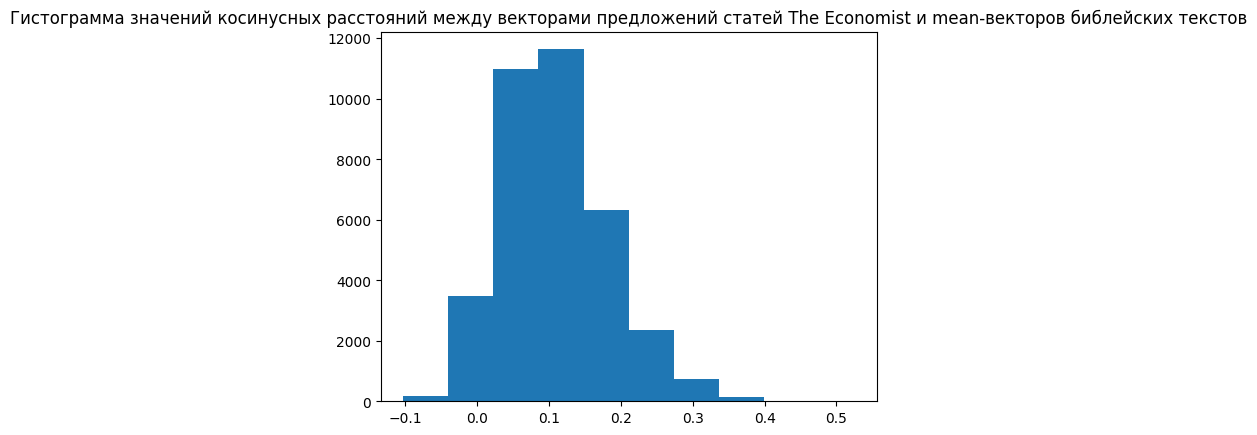

In [12]:
# рисуем гистограмму для визуализации этого порога (гистограмма значений косинусных расстояний)
import matplotlib.pyplot as plt

plt.hist(sorted(mean_cos_sims.values(), reverse=True))
plt.title("Гистограмма значений косинусных расстояний между векторами предложений статей The Economist и mean-векторов библейских текстов")
plt.show()

In [13]:
import pandas as pd

econ_text = pd.read_csv("/content/prep_bio_Economist_SW.csv")
bible_text = pd.read_csv("/content/prep_asb_SW.csv")

### Базовая версия

Находим предложения из экономиста, которые близки к среднему библейскому

In [14]:
b_sent_in_e = [] # массив предложений из Экономиста, которые похожи на библейские
for ind, cos_sim_ in cos_sims: # cos_sims - список полученных пар: индексы предложений из экономиста и косинусное расстояние к среднему
    if cos_sim_ > 0.35:
        b_sent_in_e.append(econ_text.iloc[ind].Text)


In [15]:
len(b_sent_in_e)

110

In [16]:
b_sent_in_e

['By Jim Al-Khalili and Johnjoe McFadden.',
 'Be good to your neighbours, in other words, lest they gang up and condemn you to death.',
 "SIR – In your obituary you wrote “by Mr Nair's account, Mr Lee promised to crush him [J.B. Jeyaretnam], crying ‘I will make him crawl on his bended knees and beg for mercy.'",
 'And for those who did the ARVs would have to be paid for.',
 'As one sonorous verse puts it:Do you not see that Allah is exalted by whomever is within the heavens and on the earth, and by the birds with wings spread?',
 'But hendra and nipah arrived via horses and pigs respectively that bats had defecated onto.',
 'And from others still they took the sevenths.',
 "“You know, when I'm dead and buried, these 5,500 acres are not going to be shovelled up and put in my casket with me.",
 'The men who had tortured and beaten him there thrust him into a car.',
 'Later, they were displaced by goose barnacles and mussels.',
 'As a verse in the New Testament puts it, rain falls on the 

**ESTHER 4:8**
He also gave him a copy of the text of the edict for their annihilation, which had been published in Susa, to show to Esther and explain it to her, and he told him to instruct her to go into the king’s presence ***to beg for mercy*** and plead with him for her people.


**MATTHEW 5:45**
that ye may be sons of your Father who is in heaven: ***for he maketh his sun to rise on the evil and the good, and sendeth rain on the just and the unjust***.

### Версия с аналогами из Библии

Теперь мы выровняем наши тексты по предложениям, т.е. для каждого из предложений одного текста найдем максимально подходящее предложение из другого. Алгоритм будет следующий:



1.   Берём предложение из текста статей журнала *The Economist*;
2.   Сравниваем его с каждым предложением из текста *Библии (American Standard Version)*;
3.   Наиболее похожее по косинусной близости библейское предложение и будет эквивалентом данного предложения из научно-популярных статей.



In [45]:
orig_econ = pd.read_csv("/content/bio_Economist.csv")
orig_econ

,Unnamed: 0.1,Unnamed: 0,text,title,date,link
0,0,0,FOR THE past four billion years or so the only...,The promise and perils of synthetic biology,Apr 4th 2019,https://www.economist.com/leaders/2019/04/04/t...
1,1,1,IN A former leatherworks just off Euston Road ...,Will artificial intelligence help to crack bio...,Jan 7th 2017,https://www.economist.com/science-and-technolo...
2,2,2,“How many cells are there in a human being?” I...,The idea of “holobionts” represents a paradigm...,Jun 14th 2023,https://www.economist.com/science-and-technolo...
3,3,3,LIVING creatures are jolly useful. Farmers rea...,The remarkable promise of cell-free biology,May 4th 2017,https://www.economist.com/leaders/2017/05/04/t...
4,4,4,"A broken brain, hidden inside a skull, is hard...",Better brain biology will deliver better medic...,Sep 21st 2022,https://www.economist.com/technology-quarterly...
...,...,...,...,...,...,...
957,957,957,Science can be a little scary. Its potential t...,Towards immortality,Nov 16th 2006,https://www.economist.com/news/2006/11/16/towa...
958,958,958,IT MAY challenge the spirit to think of caulif...,The king of cauliflowers,Feb 12th 2015,https://www.economist.com/middle-east-and-afri...
959,959,959,"MAJOR DEPRESSION is a serious illness, but als...",A blood test may help the diagnosis and treatm...,May 6th 2021,https://www.economist.com/science-and-technolo...
960,960,960,Holt StudiosA beautiful crop of plasticAt the ...,Meet industrial biotech,Nov 20th 2003,https://www.economist.com/news/2003/11/20/meet...


In [52]:
orig_econ.dropna(inplace=True)

In [51]:
orig_econ['text'] = orig_econ['text'].replace('■', '')

In [32]:
orig_bible = pd.read_csv('/content/asb.csv')
orig_bible

,Verse ID,Book Name,Book Number,Chapter,Verse,Text
0,1,Genesis,1,1,1,In the beginning God created the heavens and t...
1,2,Genesis,1,1,2,And the earth was waste and void; and darkness...
2,3,Genesis,1,1,3,"And God said, Let there be light: and there wa..."
3,4,Genesis,1,1,4,"And God saw the light, that it was good: and G..."
4,5,Genesis,1,1,5,"And God called the light Day, and the darkness..."
...,...,...,...,...,...,...
31097,31098,Revelation,66,22,17,"And the Spirit and the bride say, Come. And he..."
31098,31099,Revelation,66,22,18,I testify unto every man that heareth the word...
31099,31100,Revelation,66,22,19,and if any man shall take away from the words ...
31100,31101,Revelation,66,22,20,"He who testifieth these things saith, Yea: I c..."


In [ ]:
orig_bible.dropna(inplace=True)

In [33]:
list(orig_bible.columns.values )

['Verse ID', 'Book Name', 'Book Number', 'Chapter', 'Verse', 'Text']

In [21]:
len(bible_embeds)

35350

In [22]:
len(bible_text)

35350

Для текущего вектора предложения из корпуса  The Economist: если расстояние между ним и вектором условно "среднего" библейского меньше или равно 0.4, то мы для него пару не ищем. Таким образом происходит фильтрация по косиносному расстоянию.


In [58]:
for i, econ_embed in enumerate(econ_embeds):
    sim_bt_econ_and_mean_bible = cos_sim(econ_embed, bible_mean)
    if sim_bt_econ_and_mean_bible <= 0.4: # подбираем эквиваленты и косинусные расстояние
        continue

    candidates = {}
    for j, bible_embed in enumerate(bible_embeds):
        sim = cos_sim(econ_embed, bible_embed)
        candidates[j] = sim

    max_id = max(candidates.items(), key=lambda x: x[1])[0]
    print('Bible sentence: ', bible_text.iloc[max_id].Text)
    print('The Economist sentence: ', econ_text.iloc[i].Text, 'ind: ', i)
    print(sim_bt_econ_and_mean_bible)
    print('*'*10)

Bible sentence:  and the seven left no seed.
The Economist sentence:  And from others still they took the sevenths. ind:  2028
0.45572925
**********
Bible sentence:  And Joktan begat Almodad, and Sheleph, and Hazarmaveth, and Jerah,
The Economist sentence:  By Jim Al-Khalili and Johnjoe McFadden. ind:  2193
0.52453357
**********
Bible sentence:  Slay all her bullocks; let them go down to the slaughter: woe unto them!
The Economist sentence:  They would twirl around it, push its tentacles up and down, and whip their tails about. ind:  2275
0.41036177
**********
Bible sentence:  And wherefore one?
The Economist sentence:  And so on. ind:  3119
0.41902247
**********
Bible sentence:  Depart from evil, and do good; And dwell for evermore.
The Economist sentence:  Encourage the good to outwit the bad and, with luck, you keep Nemesis at bay. ind:  3210
0.40267172
**********
Bible sentence:  the likeness of any beast that is on the earth, the likeness of any winged bird that flieth in the heav

Bible sentence:  Depart from evil, and do good; And dwell for evermore.

The Economist sentence:  Encourage the good to outwit the bad and, with luck, you keep Nemesis at bay.

**0.403**

Bible sentence:  the likeness of any beast that is on the earth, the likeness of any winged bird that flieth in the heavens

The Economist sentence:  As one sonorous verse puts it: Do you not see that Allah is exalted by whomever is within the heavens and on the earth, and by the birds with wings spread?

**0.469**

Bible sentence:  When he made a decree for the rain, And a way for the lightning of the thunder

The Economist sentence:  As a verse in the New Testament puts it, rain falls on the just and the unjust alike.

**0.426**

Bible sentence:  Devise not evil against thy neighbor, Seeing he dwelleth securely by thee.

The Economist sentence:  Be good to your neighbours, in other words, lest they gang up and condemn you to death.

**0.519**

Bible sentence:  and saying, Lord, my servant lieth in the house sick of the palsy, grievously tormented.

The Economist sentence:  The Shakespearean curse, “a plague on both your houses”, would have had real resonance then.

**0.419**

Код ниже позволяет найти предложения в контексте:

In [48]:
our_sent = "Be good to your neighbours, in other words, lest they gang up and condemn you to death"
for i, text in enumerate(orig_econ.text.values):
    if our_sent in text: #our_sent -- предложение которое нас интересует
      print(orig_econ.title.iloc[i])
      #print(orig_econ[['text', 'title', 'date']].iloc[i])  - более информативный вид поиска

Two books explore the evolutionary origins of morality


In [37]:
orig_bible.Text = orig_bible.Text.astype(str)

In [41]:
our_bible_sent = "Devise not evil against thy neighbor, Seeing he dwelleth securely by thee."
for i, text in enumerate(orig_bible.Text.values):
  if our_bible_sent in text:
    print(orig_bible[['Book Name', 'Book Number', 'Chapter', 'Verse', 'Text']].iloc[i]) #our_sent -- предложение которое нас интересует

Book Name                                               Proverbs
Book Number                                                   20
Chapter                                                        3
Verse                                                         29
Text           Devise not evil against thy neighbor, Seeing h...
Name: 16484, dtype: object


*****

### Сравниваем каждое предложение экономиста с каждым библейским, а не со средним

In [55]:
for i, econ_embed in enumerate(econ_embeds):
    candidates = {}
    for j, bible_embed in enumerate(bible_embeds):
        sim = cos_sim(econ_embed, bible_embed)
        candidates[j] = sim

    max_id, max_sim = max(candidates.items(), key=lambda x: x[1])
    if max_sim <= 0.5 or max_sim >= 0.99:
        continue
    print('Bible sentence: ', bible_text.iloc[max_id].Text)
    print('The Economist sentence: ', econ_text.iloc[i].Text)
    print(max_sim)
    print('*'*10)

Выходные данные были обрезаны до нескольких последних строк (5000).
Bible sentence:  The boar out of the wood doth ravage it, And the wild beasts of the field feed on it.
The Economist sentence:  Its swivel neck lets it scan its sylvan habitat for woodrats, flying squirrels and other prey—or, rather, to scan what is left of that habitat, after decades of heavy logging.
0.5266422
**********
Bible sentence:  Hodiah, Bani, Beninu.
The Economist sentence:  Spotted owls get money.
0.56861824
**********
Bible sentence:  is not Hamath as Arpad?
The Economist sentence:  Scaleshell mussels do not.
0.6538485
**********
Bible sentence:  Now these are the generations of Terah.
The Economist sentence:  Currently, those figures are 15% and 6%.
0.5170025
**********
Bible sentence:  But certain worthless fellows said, How shall this man save us?
The Economist sentence:  But knowing how to save it is just as important.
0.50276935
**********
Bible sentence:  Moreover also I gave them statutes that were 

KeyboardInterrupt: 

In [57]:
for i, econ_embed in enumerate(econ_embeds):
    candidates = {}
    for j, bible_embed in enumerate(bible_embeds):
        sim = cos_sim(econ_embed, bible_embed)
        candidates[j] = sim

    max_id, max_sim = max(candidates.items(), key=lambda x: x[1])
    if max_sim <= 0.55 or max_sim >= 0.99:
        continue
    print('Bible sentence: ', bible_text.iloc[max_id].Text)
    print('The Economist sentence: ', econ_text.iloc[i].Text)
    print(max_sim)
    print('*'*10)

Bible sentence:  And ye shall compass the city, all the men of war, going about the city once.
The Economist sentence:  And armies already have lots of ways to flatten cities and kill people in large numbers.
0.57009554
**********
Bible sentence:  A wise man is strong; Yea, a man of knowledge increaseth might.
The Economist sentence:  It will challenge the human capacity for wisdom and foresight.
0.59683615
**********
Bible sentence:  Shall he prosper?
The Economist sentence:  It might defeat it.
0.5708265
**********
Bible sentence:  The same came for witness, that he might bear witness of the light, that all might believe through him.
The Economist sentence:  It can also weigh up the evidence for its hypotheses in an even-handed manner.
0.55624706
**********
Bible sentence:  And certain also of the Epicurean and Stoic philosophers encountered him.
The Economist sentence:  It is also a profound philosophical inquiry.
0.60216707
**********
Bible sentence:  And Jehonadab answered, It is.

KeyboardInterrupt: 

*Presently a vagrant poodle dog came idling along, sad at heart, lazy with the summer softness and the quiet, weary of captivity, sighing for change.*
Mark Twain. *The Adventures of Tom Saywer* V: "The Pinch-Bug and His Prey"